# B55 Statistical Tests
-  Statistical tests are used in hypothesis testing. In general, they can be used to:
    -  determine whether an input variable has a statistically significant relationship with an output (target) variable.
    -  estimate the difference between two or more group
-  The idea of how a statistical test works is quite simple: they assume that a particular situation occurs, and then they estimate how likely this assumption is to be false
-  Hypothesis
-  Statistical Values

## Links
-   https://towardsdatascience.com/anova-t-test-and-other-statistical-tests-with-python-e7a36a2fdc0c
-   https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [ ]:
import scipy
#https://scipy.org/
#https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide
print(scipy.__version__)

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
from pydataset import data
mtcars = data('mtcars')
mtcars.info()
df = mtcars.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [37]:
# https://pandas.pydata.org/docs/user_guide/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option("expand_frame_repr", True)
pd.set_option("max_info_columns", 11)
pd.set_option("display.precision", 3)
pd.set_option('display.width', 1000)  #wrap with full display

In [38]:
#describe
df.describe()
#count, mean, std, min, Q1, Q2, Q3, max

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000
mean,20.091,6.188,230.722,146.688,3.597,3.217,17.849,0.438,0.406,3.688,2.812
std,6.027,1.786,123.939,68.563,0.535,0.978,1.787,0.504,0.499,0.738,1.615
min,10.400,4.000,71.100,52.000,2.760,1.513,14.500,0.000,0.000,3.000,1.000
25%,15.425,4.000,120.825,96.500,3.080,2.581,16.892,0.000,0.000,3.000,2.000
50%,19.200,6.000,196.300,123.000,3.695,3.325,17.710,0.000,0.000,4.000,2.000
75%,22.800,8.000,326.000,180.000,3.920,3.610,18.900,1.000,1.000,4.000,4.000
max,33.900,8.000,472.000,335.000,4.930,5.424,22.900,1.000,1.000,5.000,8.000


## Kurtosis and Skewness
-  Skewness
    -  is a statistical term and it is a way to estimate or measure the shape of a distribution.  It is an important statistical methodology that is used to estimate the asymmetrical behavior rather than computing frequency distribution. Skewness can be two types:
        -  Symmetrical: A distribution can be called symmetric if it appears the same from the left and right from the center point.
        -  Asymmetrical: A distribution can be called asymmetric if it doesn’t appear the same from the left and right from the center point.
    -  Distribution on the basis of skewness value:
        -  Skewness = 0: Then normally distributed.
        -  Skewness > 0: Then more weight in the left tail of the distribution.
        -  Skewness < 0: Then more weight in the right tail of the distribution.
    -  scipy.stats.skew(array, axis=0, bias=True)
-  Kurtosis:
    -  It determines whether a distribution is heavy-tailed in respect of the normal distribution. It provides information about the shape of a frequency distribution.
        -  kurtosis for normal distribution is equal to 3.
        -   For a distribution having kurtosis < 3: It is called playkurtic.
        -  For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.
    -  scipy.stats.kurtosis(array, axis=0, fisher=True, bias=True)

In [39]:
import scipy
import matplotlib.pyplot as plt

In [40]:
scipy.stats.skew(df['mpg'], axis=0)

0.6404398640318834

In [41]:
scipy.stats.kurtosis(df['mpg'], axis=0)

-0.20053320971549793

<Axes: >

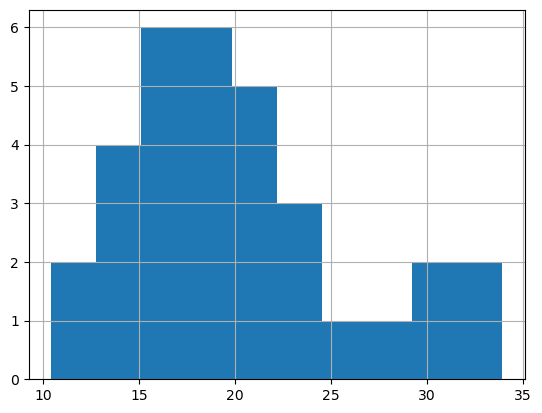

In [42]:
df['mpg'].hist()

In [46]:
df.mpg

Mazda RX4              21.0
Mazda RX4 Wag          21.0
Datsun 710             22.8
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              24.4
Merc 230               22.8
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               32.4
Honda Civic            30.4
Toyota Corolla         33.9
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              27.3
Porsche 914-2          26.0
Lotus Europa           30.4
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora          15.0
Volvo 142E             21.4
Name: mpg, dtype: float64

In [45]:
x=df['mpg']
print('Count %.0f, Mean %.3f, Min %.3f, Max %.3f, SD %.3f' % (len(x), x.mean(), x.min(), x.max(), x.std()))
print('Kurtosis [Peakedness] = %.3f , Skewness [Tilt on Right] =%.3f' % (scipy.stats.kurtosis(x), scipy.stats.skew(x)))
#platokurtic (plateau/flat) ; Left Skewed (more wt on left, more values on left of mean)
df[df['mpg'] <= 20]['mpg'].count()

Count 32, Mean 20.091, Min 10.400, Max 33.900, SD 6.027
Kurtosis [Peakedness] = -0.201 , Skewness [Tilt on Right] =0.640


18

In [47]:
#normal distributed data
x = np.random.normal(0, 2, 10000000)
x

array([ 2.22561716, -2.62741452, -0.03743018, ...,  1.98205308,
       -4.39513588,  1.10271696])

In [49]:
print('Count %.0f, Mean %.3f, Min %.3f, Max %.3f, SD %.3f' % (len(x), x.mean(), x.min(), x.max(), x.std()))
print('Kurtosis [Peakedness] = %.3f , Skewness [No Tilt] =%.3f' % (scipy.stats.kurtosis(x), scipy.stats.skew(x)))

Count 10000000, Mean 0.000, Min -10.151, Max 10.465, SD 2.000
Kurtosis [Peakedness] = -0.001 , Skewness [No Tilt] =0.000


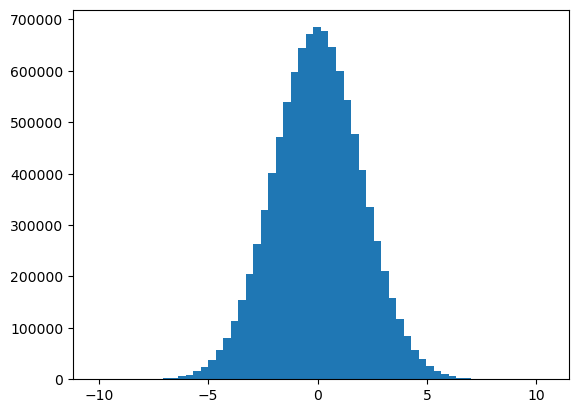

In [50]:
plt.hist(x, bins=60)
plt.show()

## quantiles/ percentile
-   In each of any set of values of a variate which divide a frequency distribution into equal groups, each containing the same fraction of the total population.
-   https://www.scribbr.com/statistics/quartiles-quantiles/

In [51]:
marks = [2,2,4,5,5,5,8,9,9,9,12]
marks, len(marks), np.mean(marks), np.median(marks)

([2, 2, 4, 5, 5, 5, 8, 9, 9, 9, 12], 11, 6.363636363636363, 5.0)

In [54]:
np.quantile(marks, q=[.25,.5,.75])

array([4.5, 5. , 9. ])

In [57]:
list(df['mpg'])

[21.0,
 21.0,
 22.8,
 21.4,
 18.7,
 18.1,
 14.3,
 24.4,
 22.8,
 19.2,
 17.8,
 16.4,
 17.3,
 15.2,
 10.4,
 10.4,
 14.7,
 32.4,
 30.4,
 33.9,
 21.5,
 15.5,
 15.2,
 13.3,
 19.2,
 27.3,
 26.0,
 30.4,
 15.8,
 19.7,
 15.0,
 21.4]

In [60]:
df.mpg.sort_values().reset_index(drop=True)[0:9]

0    10.4
1    10.4
2    13.3
3    14.3
4    14.7
5    15.0
6    15.2
7    15.2
8    15.5
Name: mpg, dtype: float64

In [62]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000
mean,20.091,6.188,230.722,146.688,3.597,3.217,17.849,0.438,0.406,3.688,2.812
std,6.027,1.786,123.939,68.563,0.535,0.978,1.787,0.504,0.499,0.738,1.615
min,10.400,4.000,71.100,52.000,2.760,1.513,14.500,0.000,0.000,3.000,1.000
25%,15.425,4.000,120.825,96.500,3.080,2.581,16.892,0.000,0.000,3.000,2.000
50%,19.200,6.000,196.300,123.000,3.695,3.325,17.710,0.000,0.000,4.000,2.000
75%,22.800,8.000,326.000,180.000,3.920,3.610,18.900,1.000,1.000,4.000,4.000
max,33.900,8.000,472.000,335.000,4.930,5.424,22.900,1.000,1.000,5.000,8.000


In [61]:
df.mpg.quantile(q=[.25])

0.25    15.425
Name: mpg, dtype: float64

In [ ]:
np.arange(0,1,.01)

In [ ]:
df.mpg.quantile(q=[0,.25, .5, .75, 1])

In [ ]:
#percentile 0 100%
df.mpg.quantile(q=np.arange(0,1,.01))

## Hypothesis Tests
- Types
  -  Check if data is normally distributed
  -  Check if data is correlated
  -  Check if two categorical variables are related or independent (Chi square Tests)
  -  Check if means of set of data is equal a value (single, or equal to mean of another set(2 tail) : t tests
  -  means of two or more independent samples are significantly different.  (ANOVA)

In [ ]:
## Hypothesis - Normal Distribution
from scipy.stats import shapiro

In [ ]:
stat, p = shapiro(df['mpg'])
print('stats = %.3f , p=%.3f' % (stat, p))

In [ ]:
if p > .05 : print('Probably -- Gaussian/ Normal')
else :  print('Probably not Normal')

In [ ]:
## Correlation Tests 
from scipy.stats import pearsonr
stat, p = pearsonr(df['wt'], df['mpg'])
print('stats = %.3f , p=%.3f' % (stat, p))

In [ ]:
if p > .05 : print('Probably -- Independent')
else :  print('Probably not Dependent')

In [ ]:
df[['wt','mpg']].corr()

## Chi-Squared Tests


In [ ]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
table

In [ ]:
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

## t -tests
-  Types
    -   Paired Students t-test :  Tests whether the means of two paired samples are significantly different.
    
-  Hypothesis
    -  H0: the means of the samples are equal.
    -  H1: the means of the samples are unequal.

In [ ]:
from scipy.stats import ttest_rel
#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data1 = df['mpg'].sample(10)
data2 = df['mpg'].sample(10)
print('data1- ', data1.tolist(), '::: data2- \t', data2.tolist())
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

## Analysis of Variance Test (ANOVA)
-  Tests whether the means of two or more independent samples are significantly different.
## Hypthesis
    -  H0: the means of the samples are equal.
    -  H1: one or more of the means of the samples are unequal.

In [ ]:
from scipy.stats import f_oneway
#data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
#data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
#data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
data1 = df['mpg'].sample(10)
data2 = df['mpg'].sample(10)
data3 = df['mpg'].sample(10)
print('data1- ', data1.tolist(), '::: \ndata2- ', data2.tolist(), '::: \ndata3- ', data3.tolist())
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

In [ ]:
data3 = df['hp'].sample(10)  #from HP Coloumn
print('data1- ', data1.tolist(), '::: \ndata2- ', data2.tolist(), '::: \ndata3- ', data3.tolist())
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

## Repeated Measures ANOVA Test (not supported)
-  Tests whether the means of two or more paired samples are significantly different.
## Hypothesis
    -  H0: the means of the samples are equal.
    -  H1: one or more of the means of the samples are unequal.

## Z-test
-  https://www.statology.org/z-test-python/
-  https://www.educba.com/python-z-test/

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

In [ ]:
#Suppose the IQ in a certain population is normally distributed with a mean of μ = 100 and standard deviation of σ = 15.
# A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels
#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,  105, 109, 109, 109, 110, 112, 112, 113, 114, 115]
#perform one sample z-test
ztest(data, value=100)
#(1.5976240527147705, 0.1101266701438426)
#Since this p-value(.11) is not less than .05, we do not have sufficient evidence to reject the null hypothesis. In other words, the new drug does not significantly affect IQ level.

In [ ]:
df.mean()

In [ ]:
ztest(df.mpg, value=20)
#pvalue > .05, do not reject Ho ()
#mean of mpg is equal to 20 is right assumption

## Two Sample Z-Test in Python
-  Suppose the IQ levels among individuals in two different cities are known to be normally distributed with known standard deviations.
-  A researcher wants to know if the mean IQ level between individuals in city A and city B are different, so she selects a simple random sample of  20 individuals from each city and records their IQ levels.
-  Ho : Mean values are same U1 = U2
-  Ha : Mean values are different U1 != U2

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 114]
cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109, 109, 114, 115, 116, 117, 117, 128, 129, 130, 133]
#perform two sample z-test
stats, p = ztest(cityA, cityB, value=0) 
print(stats, ':: P value= ', np.round(p,3) )
#Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis.
#In other words, the mean IQ level is significantly different between the two cities.

In [ ]:
# Ha : Means are different
np.mean(cityA), np.mean(cityB)  # these to be statistically

## End here